<a href="https://colab.research.google.com/github/SergeyS1954/LW_TR/blob/main/LW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 4


# Оценивание параметров систем в теории надежности

## Постановка задачи оценивания параметра системы

Пусть имеется выборка $x_1, \dots, х_n$ из генеральной совокупности с плотностью распределения $f (х, \theta)$. Предполагается, что функция плотности распределения $f (х, \theta)$ определена с точностью до неизвестного параметра $\theta$.

Ставится задача определения по выборке $x_1, \dots, х_n$ значения параметра $\theta$, которое в некотором смысле является наилучшей оценкой неизвестного параметра $\theta$.

*Точечной оценкой* неизвестного параметра или числовой характеристики распределения называется функция наблюдений $\hat\theta = \hat\theta(x_1, \dots, х_п)$, которая принимается приближенно равной  $\theta$.

Пример точечной оценки. Пусть выборка $x_1, \dots, х_п$ получена из генеральной совокупности нормально распределенной случайной величины с плотностью распределения

$$	f(x,\theta) =  \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(x - \theta)^2}{2} \right).$$


Параметр $\theta$ --- это неизвестный параметр, равный математическому ожиданию случайной величины.

Точечными оценками параметра могут служить различные статистики, в частности, выборочное среднее

$$
	\hat\theta =  \bar x = \frac{1}{n}\sum_{i = 1}^{n} x_i.
$$

Так как наблюдения $x_1, \dots, х_п$ являются случайными величинами, то и статистика точечной оценки $ \hat\theta(x_1, \dots, х_п)$ будет случайной величиной.

Невозможно построить оценку, которая принимала бы значения, близкие к величине $\theta$, для всех возможных выборок.

Всегда существует ненулевая вероятность того, что на некоторых выборках могут быть получены значения, сильно отличающиеся от истинного значения $\theta$. Это естественное следствие использования вероятностных моделей.


## Интервальная оценка параметра надежности. Доверительные интервалы


*Доверительным интервалом* числовой характеристики или параметра $\theta$ называется интервал $(\theta_1, \theta_2$ со случайными границами, для которого выполняется:

$$
\mathbb P(\theta_1 < \theta <\theta_2) = \gamma.
$$

Величина $\gamma$ называется *доверительной вероятностью оценки*.

*Доверительная вероятность оценки* --- это вероятность, с которой истинное (неизвестное) значение  характеристики  случайной величины попадет в доверительный интервал.

Часто вместо доверительной вероятности $\gamma$  рассматривается вероятность

$$\alpha = 1 - \gamma,$$
которая называется  *уровнем значимости*.

Отметим, что  доверительный интервал для параметра $\theta$  не является единственным и различные методы по разному строят границы, которые приводят к различным значениям $\theta_1$ и $\theta_2$.
Более того, для *каждой конкретной выборки* получаются отличающиеся друг от друга границы доверительных интервалов.

### Пример. Доверительный интервал для нормального распределения

Дана выборка $x_1, x_2, \dots, x_n$ объема $n$ из генеральной совокупности, имеющей нормальное распределение. На ее основе  строим соответственно выборочное среднее $$
\bar x = \frac{1}{n}\sum_{i = 1}^{n} x_i$$
и выборочное среднее квадратическое отклонение
$$
S = \frac{1}{n}\sum_{i = 1}^{n} ( x_i - \bar x )^2.$$

Полагаем, что параметры $m$ и $\sigma$ нормального распределения неизвестны.

Для данной постановки задачи известно, что случайная величина
$$
Т =	\sqrt{n - 1} \cdot \frac{\bar X - m}{S}, $$

называемая статистикой Стьюдента, распределена в соответствии с распределением Стьюдента, с $n - 1$ степенями свободы.

Пусть задан уровень значимости $\alpha$.

Обозначим $t_{1 - \alpha/2}(n - 1)$ --- квантиль распределения Стьюдента с $n - 1$ степенями свободы порядка $1 - \alpha/2$.

$$
\mathbb P( \bar X -  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}} < m < \bar X +  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}}) = 1 - \alpha,
$$
что, по определению, задает доверительный интервал для среднего значения $m$.

Пример нахождения доверительного интервала для математического ожидания генеральной совокупности нормально распределенных случайных величин $\mathcal{N}(5,1)$. Уровень значимости $\alpha = 0,05$.

Представлен график среднего значения для случайной выборки как функция длины $n$ и соответствующий доверительный интервал.

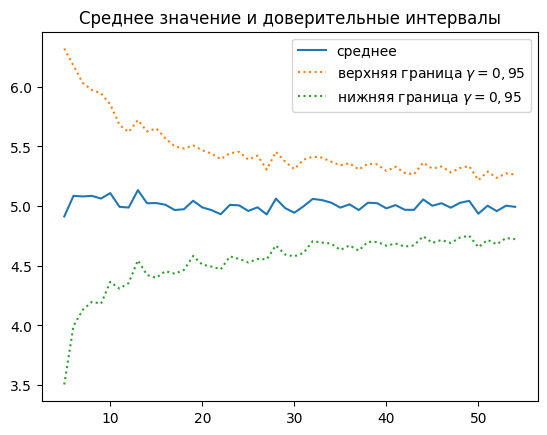

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
x1 = []
l1 = []
for st in range (5, 55, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l2 = np.array(l1)
yl = x2 - l2
yu = x2 + l2
st = np.arange(5,55,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu[st-5],':',label = r'верхняя граница $\gamma = 0,95$')
plt.plot(st,yl[st-5 ],':',label = r'нижняя граница $\gamma = 0,95$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()

Если задать более жесткий уровень значимости, например, положив $\alpha = 0.01$, то получаемые доверительные интервалы будут, естественно, более широкими. Представленный график наглядно иллюстрирует сформулированное свойство доверительных интервалов.


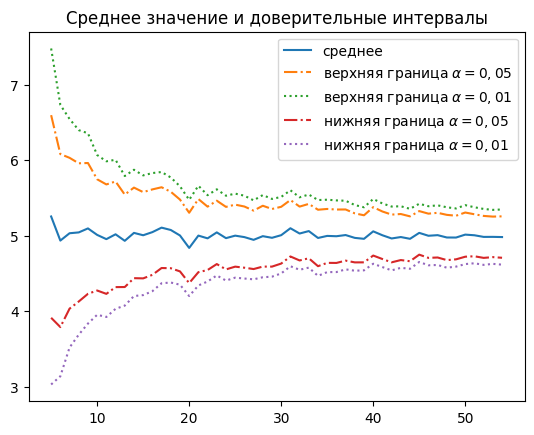

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
x1 = []
l1 = []
l2 = []
for st in range (5, 55, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
    l2.append((np.std(test1)*t.interval(0.99,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l1a = np.array(l1)
l2a = np.array(l2)
yl_095 = x2 - l1a
yl_099 = x2 - l2a
yu_095 = x2 + l1a
yu_099 = x2 + l2a
st = np.arange(5,55,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu_095[st-5],'-.',label = r'верхняя граница $\alpha = 0,05$')
plt.plot(st,yu_099[st-5],':',label = r'верхняя граница $\alpha = 0,01$')
plt.plot(st,yl_095[st-5 ],'-.',label = r'нижняя граница $\alpha = 0,05$')
plt.plot(st,yl_099[st-5 ],':',label = r'нижняя граница $\alpha = 0,01$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()

### Построение доверительных интервалов для произвольно распределенных случайных величин

На основании центральной предельной теоремы можно заключить, что подходящим образом центрированные и нормированные суммы случайных величин при достаточно общих предположениях сходятся к  $\mathcal{N}(0,1)$.

Для заданной доверительной вероятности $\gamma$  вероятность попадания истинного (неизвестного) значение математического ожидания в доверительный интервал определяется корнем уравнения, определяющего такое значение $Y(\gamma)$, для которого $\gamma \%$ плотности распределения сосредоточено на интервале $-Y(\gamma), Y(\gamma)$.

В качестве оцениваемого параметра рассмотрим математическое ожидание случайной величины.

C вероятностью $\gamma$ истинное (неизвестное) значение математического ожидания в попадает в доверительный интервал:
$$
\left( \bar X - \frac{Y(\gamma) \cdot S}{\sqrt{n}},\bar X + \frac{Y(\gamma) \cdot S}{\sqrt{n}} \right),
$$
где $S =\sqrt{S^2}$.

Отметим, что для оценки математического ожидания нормально распределенной случайной величины использовалось распределения Стьюдента с $n-1$ степенями свободы, а для произвольного распределения используется стандартное нормальное распределение  $\mathcal{N}(0, 1)$.

### Пример. Доверительный интервал для экспоненциального распределения

Рассмотрим пример определения доверительного интервала для оценки математического ожидания случайной величины, имеющей экспоненциальное распределение с параметром $\lambda = 10$. На графике представлены результаты работы программы, которая расчитывает ширину доверительного интервала для оценки математического ожидания как функцию объема выборок размером от $n = 25$ до $n = 200$.

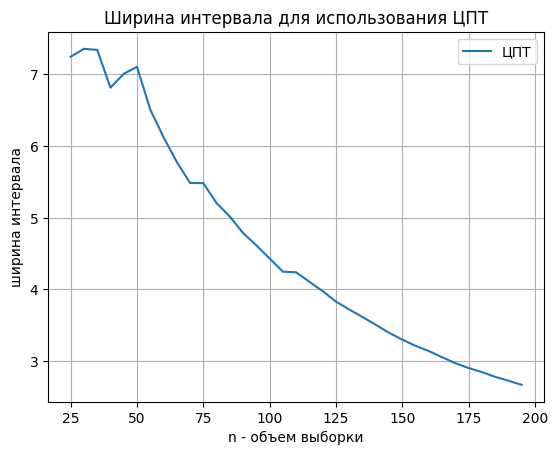

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
alpha = 0.05
gamma = 1 - alpha
f_1 = []

for n in range (25, 200, 5):
        np.random.seed(123567)
        test = np.random.exponential(10.,n)
        x = np.mean(test)
        # границы для приближения ЦПТ
        l = (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n)
        f_1.append(2* (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n))
n = np.arange(25,200,5)
fig = plt.figure()   # Отрисовка данных
plt.plot (n,f_1, '-', label = 'ЦПТ')
plt.title('Ширина интервала для использования ЦПТ')
plt.xlabel('n - объем выборки')
plt.ylabel('ширина интервала')
plt.legend()
plt.grid(True)
plt.show()

Рассмотрим еще один вариант определения доверительного интервала для оценки математического ожидания случайной величины, имеющей экспоненциальное распределение.

Доказано, что асимптотическое распределение статистики $2n\lambda\bar x$  для экспоненциально распределенной случайной величины  сходится к распределению $\chi^2$ с $2n$ степенями свободы.

Зададим уровень значимости $\alpha$. Обозначим через $\chi_{\gamma}^2(2n)$ $\gamma$-квантиль распределения хи-квадрат с  $2n$ степенями свободы. Тогда границы доверительного интервала для величины  $T_{tl} = 1/\lambda$ (среднего времени наработки на отказ устройства) определяется формулой:

$$
\frac{2n\bar x}{\chi_{(1 + \alpha)/2}^2(2n)}   \leq 1/\lambda \leq  \frac{2n\bar x}{\chi_{(1 - \alpha)/2}^2(2n)}.
$$

Расширим рассмотренный выше пример определения доверительного интервала для оценки математического ожидания случайной величины, имеющей экспоненциальное распределение с параметром $\lambda = 10$.

На графиках, представленных в следующей ячейке, приведены результаты работы программы, рассчитывающей ширину доверительных интервалов для двух асимптотических оценок математического ожидания (центральная предельная теорема и сходимость к распределению $\chi^2$ с  $2n$ степенями свободы) для указанного выше диапазона размеров выборок.

Задайте различные значения инициализации датчика случайных чисел ($np.random.seed$), сравните и объясните полученные результаты.


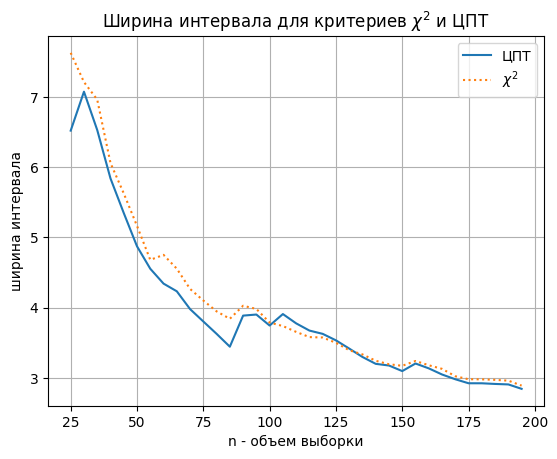

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
alpha = 0.05
gamma = 1 - alpha
f_1 = []
f_2 = []
for n in range (25, 200, 5):
        np.random.seed(123456)
        test = np.random.exponential(10.,n)
        x = np.mean(test)
        # границы для приближения ЦПТ
        l = (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n)
        # границы для приближения хи-квадрат (Двусторонняя оценка)
        theta_low = 2*n*x/chi2.ppf((1+gamma)/2, 2*n)
        theta_high = 2*n*x/chi2.ppf((1-gamma)/2, 2*n)
        f_1.append(2* (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n))
        f_2.append(2*n*x/chi2.ppf((1-gamma)/2, 2*n) - 2*n*x/chi2.ppf((1+gamma)/2, 2*n))
n = np.arange(25,200,5)
fig = plt.figure()   # Отрисовка данных
plt.plot (n,f_1, '-', label = 'ЦПТ')
plt.plot (n, f_2, ':', label = '$\chi^2$')
plt.title('Ширина интервала для критериев $\chi^2$ и ЦПТ')
plt.xlabel('n - объем выборки')
plt.ylabel('ширина интервала')
plt.legend()
plt.grid(True)
plt.show()

### Интервальная оценка параметра типа вероятность безотказной работы

Для построения оценок типа вероятности безотказной работы $\mathbb{P}$ в течение времени $t_{tl}$ используется бета-распределение.

Семейство бета-распределений с различными параметрами задает множество непрерывных случайных величин, область изменения которых --- конечный отрезок. Обычно речь идет об отрезке $[0,1].$

Бета-распределение --- двупараметрическое. Область изменения параметров бета-распределения ограничена: $\alpha > 0, \beta > 0.$

Математическое ожидание бета-распределения задаются формулой:
$$
\mathbb{M}\xi = \frac{\alpha}{\alpha + \beta}.
$$

Дисперсия бета-распределения задается формулой:

$$
\mathbb{D}\xi = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
$$

При $\alpha > 1 $ и $\beta > 1 $ бета-распределение унимодально с модой в точке $x = \frac{\alpha - 1}{\alpha + \beta - 2}.$

В случае   $\alpha = 1, \beta = 1$ бета-распределение вырождается в равномерное распределение, заданное на отрезке $[0,1].$

График плотности распределения случайной величины с бета-распределением и некоторыми парами значений параметров приведены ниже.

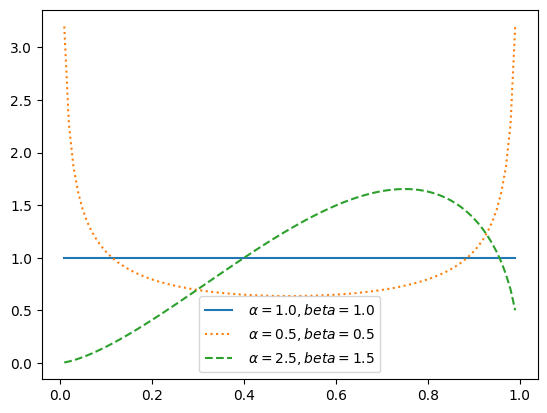

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
alpha = 1.0
beta = 1.0
x = np.arange (0.01, 1.0, 0.01)
y2 = stats.beta.pdf(x, alpha, beta)
y3 = stats.beta.pdf(x, 0.5*alpha, 0.5*beta)
y4 = stats.beta.pdf(x, 2.5*alpha, 1.5*beta)
plt.plot(x,y2, label = r" $\alpha = 1.0, beta = 1.0$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha = 0.5, beta = 0.5$")
plt.plot(x,y4, linestyle = '--', label = r" $\alpha = 2.5, beta = 1.5$")
plt.legend()
plt.show()

Для оценки вероятности безотказной работы $\mathbb{P}$ в течение времени $t_{test}$ обычно используется следующий план испытаний.

Проводятся $n$ экспериментов, каждый из которых состоит в испытаниях одного экземпляра объекта в установленных условиях эксплуатации в течение времени $t_{test}$.
Фиксируется общее число отказов $b$.

Точечная оценка вероятности безотказной работы $\hat{P}$ задается как
$\hat{P} = 1 - \frac{b}{n} = \frac{n - b}{n}.$

Для нижней и верхней  границ доверительного интервала $\theta_{1}$  и $\theta_{2}$ справедливы уравнения (известные как уравнения Клоппера-Пирсона):

$$
\sum_{i = k }^{n}C_{n}^{i}(\theta_1)^{i}(1 - \theta_1)^{n-i} = B(\theta_1,k,n-k +1) = (1 - \gamma)/2.
$$
$$
\sum_{i = 0 }^{k}C_{n}^{i}(\theta_2)^{i}(1 - \theta_2)^{n-i} = 1 - B(\theta_2,k+1,n-k) = (1 + \gamma)/2.
$$

Пример.

Пусть завод-изготовитель заявил, что с вероятностью $0.99$ поставляемое устройство проработает $1000$ часов.

В течение $1000$ часов проведены испытания $40$ устройств, из которых $2$ отказали.

Точечная оценка вероятности безотказной работы устройства $(40 - 2)/40 = 0.95$.

Необходимо построить доверительный интервал для точечной оценки вероятности безотказной работы устройства. В данном случае $k = n - b.$

Границы доверительного интервала для уровня значимости $\alpha = 0,05$ расчитываются как квантили бета-распределения.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
gamma = 0.95
n = 40
k = 2
#x = np.arange (0.01, 1.0, 0.01)
theta1 = stats.beta.ppf((1 - gamma)/2,n - k, k + 1)
theta2 = stats.beta.ppf((1 + gamma)/2,n - k + 1 ,k)
print(round(theta1,3)," - ", round(theta2,3))

0.831  -  0.994


Сделайте вывод по результатам испытаний.

Какой вывод можно сделать, если в результате испытаний отказало $3$ устройства?

## Последовательная процедура Вальда

В ранее рассмотренных методах проверки статистических гипотез использовались выборки фиксированного объема.  В середине XX века А. Вальдом была предложена теория *последовательной проверки гипотез*, или *последовательный анализ*.

Основная идея последовательной проверки гипотез состоит в том, что число наблюдений, необходимое для принятия решения по гипотезе, является случайной величиной и зависит от конкретных исходов испытаний.
Таким образом,  число наблюдений при выполнении проверки некоторой гипотезы может оказаться меньше, чем параметр $n$ рассмотренных ранее методов.

Значение математического ожидания числа наблюдений до принятия решения об истинности гипотезы в последовательном анализе становится не параметром, а характеристикой качества процедуры.

Зависимость принимаемого решения от наблюдаемых значений выборки реализуется в  последовательном критерии отношения правдоподобия.

Зададим две положительные константы: $A_0 < 1$ и $A_1 > 1$. Рассмотрим процедуру выполнения наблюдений до тех пор, пока значение отношения правдоподобия не выйдет за какую-либо из границ:
$$A_0 < L_{1n}/L_{0n} < A_1.$$

Если в момент прекращения испытаний ({\it момент остановки}) $L_{1n}/L_{0n} < A_0$, то принимается гипотеза $\mathbb{H}_0$, если же $L_{1n}/L_{0n} > A_1$, то принимается гипотеза $\mathbb{H}_1$.

Таким образом, метод последовательной проверки гипотезы предполагает на каждой стадии наблюдений (испытаний) принятие одного из трех возможных решений: принять гипотезу $\mathbb{H}_0$, отклонить ее или продолжить наблюдения.

Перед планированием процедуры последовательного анализа необходимо выбрать приемлемые величины вероятностей допустимых ошибок: $\alpha = \mathbb{P}\{\mathbb{H}_1|\mathbb{H}_0\}$ --- вероятность ошибки первого рода, т.\,е.  принятия гипотезы $\mathbb{H}_1$  при истинности гипотезы $\mathbb{H}_0$,  и $\beta = \mathbb{P}\{\mathbb{H}_0|\mathbb{H}_1\}$ --- вероятность
ошибки второго рода, т.\,е. принятия гипотезы $\mathbb{H}_0$ при истинности гипотезы $\mathbb{H}_1$.

Характеристиками качества процедуры являются величины математического ожидания числа испытаний при истинности гипотезы $\mathbb{H}_j$: $\mathbb{M}_j(\nu) = \mathbb{M}(\nu|\mathbb{H}_j),\  j = 0,1.$


### Момент остановки в процедуре Вальда

Для простоты будем предполагать, что плотности $f_j(x) > 0,\ j = 0, 1,$ и не тождественны.

В этом случае определена и не вырождена случайная величина $Z = \ln (f_1(\xi)/f_0(\xi))$.

Будем считать, что существуют математическое ожидание $\mathbb{M}_{\theta}Z$ и дисперсия $\mathbb{D}_{\theta}Z > 0 \ (\theta = \theta_1, \theta_2)$.

Обозначим $Z_i = \ln (f_1(X_i)/f_0(x_i)), i = 1,2,\dots,$ где $X_1, X_2, \dots $ --- последовательные независимые наблюдения над $\xi$.

Тогда $Z_1, Z_2, \dots$	 являются независимыми наблюдениями над случайной величиной $Z$, и если обозначить через $z_1,z_2, \dots$ наблюдавшиеся реализации этих величин, то  процедура проверки гипотез заканчивается принятием гипотез $\mathbb{H}_0$ или $\mathbb{H}_1$ при первом значении $n$, при котором нарушается левое или правое  из неравенств:
$$	 a_0 = \ln{A_0} < z_1 + z_2 + \dots + z_n < \ln{A_1} = a_1, a_0 < 0, a_1 > 0.
$$

Критерию остановки можно дать следующую наглядную геометрическую интерпретацию.

Рассмотрим блуждающую на плоскости частицу, находящуюся в начальный момент в начале координат, ордината которой в каждый целочисленный момент времени $t = 1,2,\dots$ получает приращение $z_t$.

Тогда ордината частицы в момент $t = n$ будет равна $z_1 + z_2 + \dots + z_n$, и блуждание продолжается, пока траектория частицы впервые не выйдет за пределы полосы, ограниченной двумя горизонтальными прямыми на уровнях $a_0$ и $a_1$.

Выход траектории на верхнюю (нижнюю) границу приводит к принятию гипотезы $\mathbb{H}_1(\mathbb{H}_0)$.

Геометрическая интерпретация 1 процедуры Вальда представлена в ячейке.



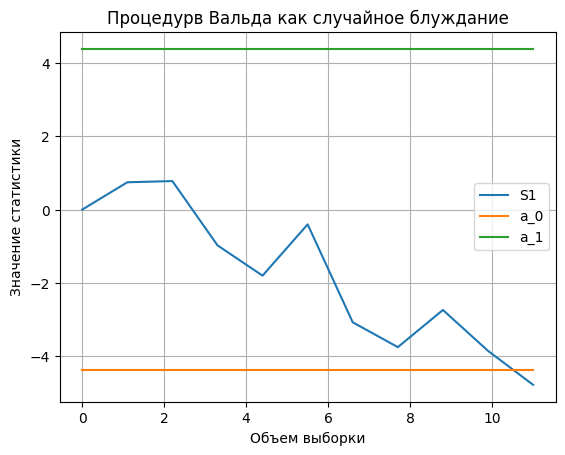

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.1
beta = 0.1
theta0 = 0
theta1 = 0.5
sigma2 = 1.0
size = 100
# Инициализация датчика случайных чисел
np.random.seed(123)
arr_1 = np.random.normal(theta0, sigma2, size)
# Вычисление границ
a_0  = (sigma2/(theta1 - theta0))*np.log(beta/(1 - alpha))
a_1  = (sigma2/(theta1 - theta0))*np.log((1 - beta)/alpha)
sum = 0
theta = theta0 + theta1
h0 = 0
h1 = 0
s1 = []
s = 0
#Основной цикл
for i in range(size):
    s = sum - i/2*theta
    s1.append(sum - i/2*theta)
    if s < a_0 :
        h0 = 1
        break
    if s > a_1 :
        h1 = 1
        break
    else : i = i + 1
    sum = sum + arr_1[i]
x = np.linspace(0,i+1,i+1)
plt.plot(x, s1, label='S1')
plt.plot(x, np.linspace(a_0,a_0,i+1), label='a_0')
plt.plot(x, np.linspace(a_1,a_1,i+1), label='a_1')
plt.legend()
plt.ylabel("Значение статистики")
plt.xlabel('Объем выборки')
plt.title("Процедурв Вальда как случайное блуждание")
plt.grid()
plt.show()

Задавая различные значения для инициализации датчика случайных чисел, убедитесь в том, что может достигаться как верхняя, так и нижняя границы.

Сравните абсциссы точек достижения границ с объемом выборки ($100$). Объясните полученные результаты.  

## Процедура последовательного усеченного плана испытаний по ГОСТ 27.403-2009  

Процедура последовательного усеченного плана испытаний по ГОСТ 27.403-2009  по сути является вариантом реализации последовательной процедуры Вальда в предметной области теории надежности.

В ходе проведения испытаний $N$ изделий  в течение интервала испытаний $T_{t1}$ произошло $n_1$ отказов изделия.

Необходимо сделать вывод о годности к приемке изделий для среднего времени наработки на отказ, лежащего в границах от $T_{l}$ до  $T_{u}$ часов, если заданы: риск изготовителя забраковать годные изделия $\alpha$ и  риск потребителя принять негодные изделия $\beta$.

Для принятия решения в соответствии с методикой ГОСТ 27.403-2009 усеченного плана испытаний изделия  построим графики линии браковки и линии приемки.

Уравнение линии браковки задается соотношением:

$$ f_{rej}(t) = \frac{\ln(1-\beta) - \ln\alpha}{\ln T_{u} - \ln T_{l}} + \frac{1/T_{l} - 1/T_{u}}{\ln T_{u} - \ln T_{l}}\cdot t.$$

Уравнение линии приемки  задается соотношением:

$$ f_{acc}(t) = \frac{\ln(\beta) - \ln(1 - \alpha)}{\ln T_{u} - \ln T_{l}} + \frac{1/T_{l} - 1/T_{u}}{\ln T_{u} - \ln T_{l}}\cdot t.$$


Формальная реализация процедуры приемки в данном конкретном случае выглядит следующим образом:

1. Если $n_1 \leq f_{acc}(N\cdot T_{t1})$, то   партия изделий принимается;

2. Если $n_1 \geq f_{rej}(N\cdot T_{t1})$, то партия изделий бракуется;

3. Если $ f_{п}(N\cdot T_{t1}) <  n_1 < f_{rej}(N\cdot T_{t1})$, необходимо продолжить испытания.

Рассмотрим конкретный пример.
Пусть $N = 10$,  $T_{t1} = 150$, $\alpha$ = $\beta$ = 0,05.
 $T_{u}= 1000$ часов. $T_{u}= 90$ часов.

Программа построения линий приемки и браковки представлена в ячейке ниже.


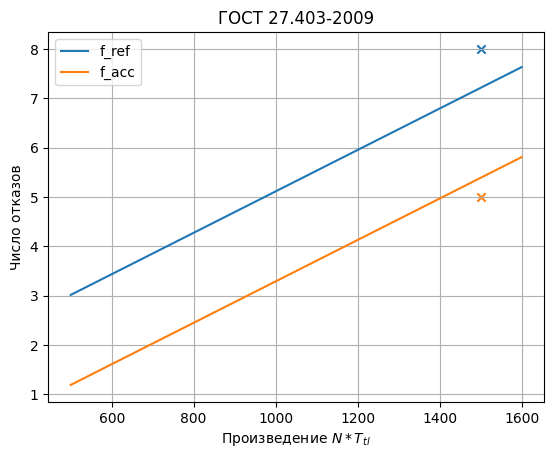

In [9]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.05
beta = 0.05
N = 10
T_tl = 150.0
T_u = 1000.0
T_l = 90.0
x = np.arange (500, (N+1)*T_tl, 100)
b0= (np.log(1 - beta) - np.log(alpha))/(np.log(T_u) - np.log(T_l))
k0 = (1/T_l - 1/T_u)/(np.log(T_u) - np.log(T_l))

f_ref= b0+ k0*x
#generate random aray
b1= (np.log(beta) - np.log(1 - alpha))/(np.log(T_u) - np.log(T_l))
k1 = (1/T_l - 1/T_u)/(np.log(T_u) - np.log(T_l))
f_acc = b1+ k1*x

plt.plot(x, f_ref, label='f_ref')
plt.plot(x, f_acc, label='f_acc')
# Контрольные точки
plt.scatter(1500, 8, marker='x')
plt.scatter(1500, 5, marker='x')

plt.ylabel("Число отказов")
plt.xlabel('Произведение $N*T_{tl}$')
plt.title("ГОСТ 27.403-2009")
plt.legend()
plt.grid()
plt.show()

Для данной задачи $N*T_{t1} = 1500$. Из представленного графика получаем решение:

если число отказов $n_1 \leq 5$, партия изделий принимается;

если число отказов $n_1 \geq 8$, партия изделий бракуется;

в ином случае испытания необходимо продолжить.

Как изменится решение, если изменить значения параметров $\alpha$ и $\beta$?

Как изменится решение, если изменить значения параметров $N$ и $T_{tl}$?